In [19]:
import os
import numpy as np


In [21]:
# !python --version
# !pip install tensorflow==2.17.1  # had to install locally

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [29]:
dataset_url = "https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip"
dataset_zip = "data.zip"
data_dir = "./data"

if not os.path.exists(data_dir):
    print("Downloading dataset...")
    os.system(f"wget {dataset_url} -O {dataset_zip}")
    print("Unzipping dataset...")
    os.system(f"unzip {dataset_zip} -d ./")
else:
    print("Dataset already downloaded and extracted.")


Dataset already downloaded and extracted.


In [31]:
# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Verify Dataset Structure
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("Train or Test directories are missing. Please check the dataset structure.")




In [35]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [37]:

# Load the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',  # Binary classification
    shuffle=True,
    seed=SEED
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [39]:

# Create the model
model = Sequential([
    Input(shape=(200, 200, 3)),  # Define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])




In [41]:

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.002, momentum=0.8),
    loss='binary_crossentropy',  # Binary classification
    metrics=['accuracy']
)



In [43]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=test_generator
)



/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 511ms/step - accuracy: 0.5304 - loss: 0.7040 - val_accuracy: 0.6169 - val_loss: 0.6683
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.6260 - loss: 0.6408 - val_accuracy: 0.6318 - val_loss: 0.6352
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.6594 - loss: 0.6085 - val_accuracy: 0.6269 - val_loss: 0.6479
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.6906 - loss: 0.5829 - val_accuracy: 0.6368 - val_loss: 0.6308
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.6846 - loss: 0.5931 - val_accuracy: 0.6567 - val_loss: 0.6124
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.7183 - loss: 0.5578 - val_accuracy: 0.6517 - val_loss: 0.6047
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.7065 - loss: 0.5479 - val_accuracy: 0.6517 - val_loss: 0.6052
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.7422 - loss: 0.5283 - val_accuracy: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.6992 - loss: 0.5810
Test Accuracy: 0.69


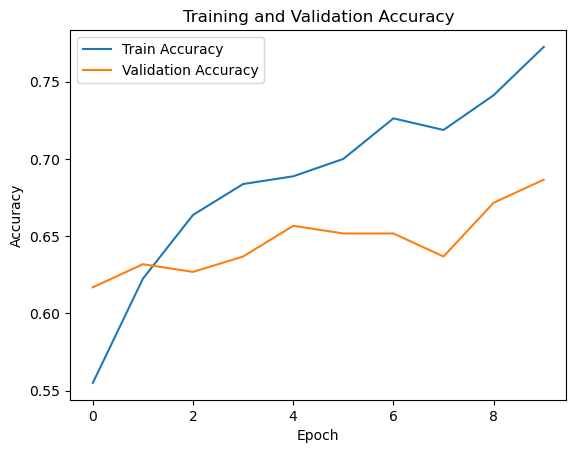

In [47]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


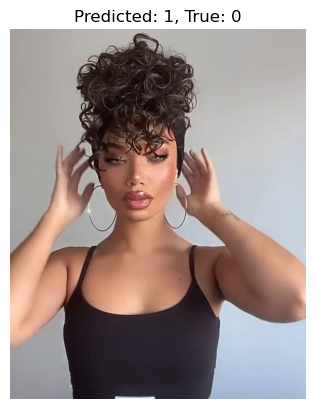

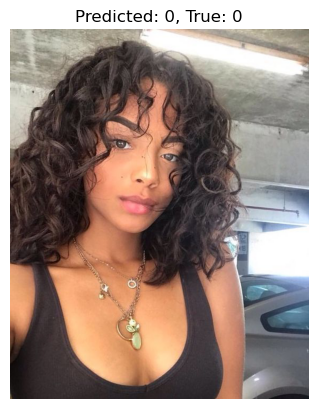

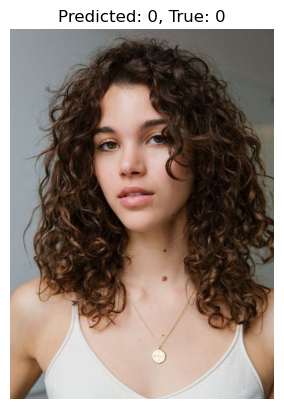

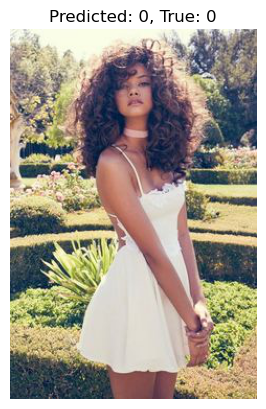

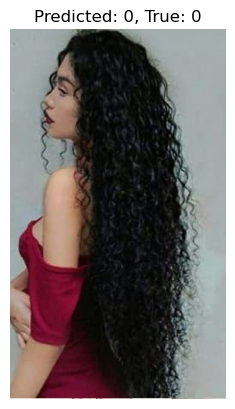

In [49]:

# Predictions
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")

# Display some predictions
for i, (img, label) in enumerate(zip(test_generator.filepaths[:5], predicted_classes[:5])):
    plt.imshow(plt.imread(img))
    plt.title(f"Predicted: {predicted_classes[i][0]}, True: {test_generator.labels[i]}")
    plt.axis('off')
    plt.show()

Question 2: total numbers of parameters?

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,146,948 (153.15 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,073,475 (76.57 MB)

Answer2 is 20,073,475 total number of trainable parameters

In [53]:

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True
)


Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [55]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.7488 - loss: 0.4859 - val_accuracy: 0.6816 - val_loss: 0.5947
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.7883 - loss: 0.4449 - val_accuracy: 0.6816 - val_loss: 0.5752
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.8092 - loss: 0.4251 - val_accuracy: 0.6468 - val_loss: 0.6442
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.8077 - loss: 0.4072 - val_accuracy: 0.6368 - val_loss: 0.7000
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.8119 - loss: 0.4254 - val_accuracy: 0.6965 - val_loss: 0.5603
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8491 - loss: 0.3816 - val_accuracy: 0.7114 - val_loss: 0.5565
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.8668 - loss: 0.3512 - val_accuracy: 0.6716 - val_loss: 0.6105
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.8769 - loss: 0.3201 - val_accuracy: 0.

In [57]:
# Extract training accuracy and loss
train_accuracies = history.history['accuracy']  # List of training accuracies for each epoch
train_losses = history.history['loss']          # List of training losses for each epoch

# Calculate the median of training accuracy
median_accuracy = np.median(train_accuracies)
print(f"Median Training Accuracy: {median_accuracy}")

# Calculate the standard deviation of training loss
std_loss = np.std(train_losses)
print(f"Standard Deviation of Training Loss: {std_loss}")

Median Training Accuracy: 0.8212499916553497
Standard Deviation of Training Loss: 0.06727967822369552


In [59]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Extract training metrics
train_accuracies = history.history['accuracy']
train_losses = history.history['loss']

# Calculate median of training accuracy
median_accuracy = np.median(train_accuracies)
print(f"Median Training Accuracy: {median_accuracy}")

# Calculate standard deviation of training loss
std_loss = np.std(train_losses)
print(f"Standard Deviation of Training Loss: {std_loss}")

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.9181 - loss: 0.2383 - val_accuracy: 0.6667 - val_loss: 0.7455
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9039 - loss: 0.2490 - val_accuracy: 0.7264 - val_loss: 0.5520
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.9422 - loss: 0.2033 - val_accuracy: 0.7363 - val_loss: 0.6148
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.9311 - loss: 0.1830 - val_accuracy: 0.6965 - val_loss: 0.6896
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.9087 - loss: 0.2597 - val_accuracy: 0.7463 - val_loss: 0.6079
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.9592 - loss: 0.1438 - val_accuracy: 0.7264 - val_loss: 0.6565
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.9654 - loss: 0.1252 - val_accuracy: 0.7463 - val_loss: 0.6410
Epoch 8/10
40/40 ━━━━━

Question5

In [61]:
# Augmented training data generator
train_datagen_augmented = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test data generator remains the same (no augmentations)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Updated training generator with augmentations
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

# Test generator (no augmentations)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)


Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [63]:
# Train the model with augmented data
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6836 - loss: 0.6399

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accuracy: 0.6835 - loss: 0.6394 - val_accuracy: 0.7711 - val_loss: 0.5165
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.7118 - loss: 0.5853 - val_accuracy: 0.7662 - val_loss: 0.4973
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - accuracy: 0.7132 - loss: 0.5616 - val_accuracy: 0.7264 - val_loss: 0.5285
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.7409 - loss: 0.5213 - val_accuracy: 0.7562 - val_loss: 0.5034
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.7133 - loss: 0.5574 - val_accuracy: 0.7264 - val_loss: 0.5735
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.6982 - loss: 0.5566 - val_accuracy: 0.6567 - val_loss: 0.6820
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.7519 - loss: 0.5531 - val_accuracy: 0.7363 - val_loss: 0.5138
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.7642 - loss: 0.4758 - val_accuracy: 0.7463 - v

Median Training Accuracy with Augmentation

In [65]:
median_accuracy_augmented = np.median(history_augmented.history['accuracy'])
print(f"Median Training Accuracy (Augmented): {median_accuracy_augmented}")


Median Training Accuracy (Augmented): 0.7243750095367432


Standard Deviation of Training Loss with Augmentation

In [67]:
std_loss_augmented = np.std(history_augmented.history['loss'])
print(f"Standard Deviation of Training Loss (Augmented): {std_loss_augmented}")


Standard Deviation of Training Loss (Augmented): 0.0302192900178266


Mean of test loss (validation loss) across all epochs

In [69]:
mean_test_loss = np.mean(history_augmented.history['val_loss'])
print(f"Mean Test Loss (Augmented): {mean_test_loss}")

Mean Test Loss (Augmented): 0.5268134325742722


Question 6

In [71]:
# Extract test accuracy (validation accuracy) for the last 5 epochs
test_accuracies_last_5 = history_augmented.history['val_accuracy'][-5:]

# Calculate the average of the last 5 test accuracies
average_test_accuracy_last_5 = np.mean(test_accuracies_last_5)
print(f"Average Test Accuracy (Last 5 Epochs): {average_test_accuracy_last_5}")


Average Test Accuracy (Last 5 Epochs): 0.7363184094429016
